## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices(device_type='GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [13]:
import os
import keras
import itertools


In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=0.0, l2_ratio=0.0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1=l1_ratio, l2=l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [38]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 10
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP =  [1e-2, 1e-4, 1e-8, 1e-12, 0.0]
L2_EXP =  [1e-2, 1e-4, 1e-8, 1e-12, 0.0]


from keras.regularizers import l1_l2
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for l1r, l2r in itertools.product(L1_EXP, L2_EXP):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with L1 = %.6f, L2 = %.6f" % (l1r, l2r))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    train_loss=model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    exp_name_tag = "exp-l1-%s-l2-%s" % (str(l1r), str(l2r))

    results[exp_name_tag]={'train-loss':train_loss,'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with L1 = 0.010000, L2 = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 2s 7ms/step - loss

Epoch 1/10
196/196 [==============================] - 2s 6ms/step - loss: 300.3106 - accuracy: 0.2016 - val_loss: 41.1909 - val_accuracy: 0.2649
Epoch 2/10
196/196 [==============================] - 1s 5ms/step - loss: 27.4059 - accuracy: 0.1563 - val_loss: 7.2922 - val_accuracy: 0.1000
Epoch 3/10
196/196 [==============================] - 1s 5ms/step - loss: 5.2815 - accuracy: 0.1002 - val_loss: 2.6493 - val_accuracy: 0.1000
Epoch 4/10
196/196 [==============================] - 1s 4ms/step - loss: 2.5275 - accuracy: 0.0994 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 5/10
196/196 [==============================] - 1s 5ms/step - loss: 2.4626 - accuracy: 0.0964 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 6/10
196/196 [==============================] - 1s 4ms/step - loss: 2.4626 - accuracy: 0.1007 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 2.4626 - accuracy: 0.0971 - val_loss: 2.4626 - val_accuracy: 0.1000
Ep

196/196 [==============================] - 1s 5ms/step - loss: 5.3694 - accuracy: 0.4443 - val_loss: 5.2959 - val_accuracy: 0.4512
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 5.2669 - accuracy: 0.4576 - val_loss: 5.2178 - val_accuracy: 0.4553
Epoch 8/10
196/196 [==============================] - 1s 4ms/step - loss: 5.1694 - accuracy: 0.4667 - val_loss: 5.1203 - val_accuracy: 0.4641
Epoch 9/10
196/196 [==============================] - 1s 4ms/step - loss: 5.0792 - accuracy: 0.4750 - val_loss: 5.0364 - val_accuracy: 0.4692
Epoch 10/10
196/196 [==============================] - 1s 4ms/step - loss: 4.9814 - accuracy: 0.4874 - val_loss: 4.9601 - val_accuracy: 0.4725
Experiment with L1 = 0.000100, L2 = 0.000000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
__________________________________________

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
196/196 [==============================] - 2s 6ms/step - loss: 15.6879 - accuracy: 0.2095 - val_loss: 13.9

Epoch 1/10
196/196 [==============================] - 2s 6ms/step - loss: 2.1538 - accuracy: 0.2223 - val_loss: 1.8718 - val_accuracy: 0.3472
Epoch 2/10
196/196 [==============================] - 1s 5ms/step - loss: 1.8406 - accuracy: 0.3580 - val_loss: 1.7717 - val_accuracy: 0.3795
Epoch 3/10
196/196 [==============================] - 1s 5ms/step - loss: 1.7465 - accuracy: 0.3914 - val_loss: 1.7065 - val_accuracy: 0.4044
Epoch 4/10
196/196 [==============================] - 1s 5ms/step - loss: 1.6880 - accuracy: 0.4073 - val_loss: 1.6461 - val_accuracy: 0.4257
Epoch 5/10
196/196 [==============================] - 1s 5ms/step - loss: 1.6297 - accuracy: 0.4307 - val_loss: 1.6080 - val_accuracy: 0.4378
Epoch 6/10
196/196 [==============================] - 1s 5ms/step - loss: 1.5885 - accuracy: 0.4413 - val_loss: 1.5851 - val_accuracy: 0.4425
Epoch 7/10
196/196 [==============================] - 1s 5ms/step - loss: 1.5556 - accuracy: 0.4547 - val_loss: 1.5610 - val_accuracy: 0.4515
Epoch 

196/196 [==============================] - 1s 4ms/step - loss: 1.7171 - accuracy: 0.4530 - val_loss: 1.7216 - val_accuracy: 0.4380
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 1.6833 - accuracy: 0.4576 - val_loss: 1.6820 - val_accuracy: 0.4531
Epoch 8/10
196/196 [==============================] - 1s 5ms/step - loss: 1.6444 - accuracy: 0.4734 - val_loss: 1.6733 - val_accuracy: 0.4513
Epoch 9/10
196/196 [==============================] - 1s 4ms/step - loss: 1.6263 - accuracy: 0.4770 - val_loss: 1.6347 - val_accuracy: 0.4661
Epoch 10/10
196/196 [==============================] - 1s 4ms/step - loss: 1.5880 - accuracy: 0.4924 - val_loss: 1.6231 - val_accuracy: 0.4709
Experiment with L1 = 0.000000, L2 = 0.000000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
__________________________________________

Epoch 1/10
196/196 [==============================] - 1s 5ms/step - loss: 15.7454 - accuracy: 0.1849 - val_loss: 13.9930 - val_accuracy: 0.3274
Epoch 2/10
196/196 [==============================] - 1s 4ms/step - loss: 13.5148 - accuracy: 0.3365 - val_loss: 12.1613 - val_accuracy: 0.3646
Epoch 3/10
196/196 [==============================] - 1s 4ms/step - loss: 11.7629 - accuracy: 0.3653 - val_loss: 10.6326 - val_accuracy: 0.3785
Epoch 4/10
196/196 [==============================] - 1s 4ms/step - loss: 10.2870 - accuracy: 0.3801 - val_loss: 9.3282 - val_accuracy: 0.3882
Epoch 5/10
196/196 [==============================] - 1s 4ms/step - loss: 9.0312 - accuracy: 0.3935 - val_loss: 8.2236 - val_accuracy: 0.3988
Epoch 6/10
196/196 [==============================] - 1s 4ms/step - loss: 7.9628 - accuracy: 0.4047 - val_loss: 7.2688 - val_accuracy: 0.4088
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 7.0570 - accuracy: 0.4125 - val_loss: 6.4703 - val_accuracy: 0.4184

196/196 [==============================] - 1s 4ms/step - loss: 1.5618 - accuracy: 0.4517 - val_loss: 1.5584 - val_accuracy: 0.4563
Epoch 7/10
196/196 [==============================] - 1s 4ms/step - loss: 1.5345 - accuracy: 0.4644 - val_loss: 1.5364 - val_accuracy: 0.4568
Epoch 8/10
196/196 [==============================] - 1s 4ms/step - loss: 1.5020 - accuracy: 0.4736 - val_loss: 1.5125 - val_accuracy: 0.4625
Epoch 9/10
196/196 [==============================] - 1s 4ms/step - loss: 1.4713 - accuracy: 0.4811 - val_loss: 1.5084 - val_accuracy: 0.4628
Epoch 10/10
196/196 [==============================] - 1s 4ms/step - loss: 1.4492 - accuracy: 0.4909 - val_loss: 1.4759 - val_accuracy: 0.4779
Experiment with L1 = 0.000000, L2 = 0.000000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
__________________________________________

In [33]:
results

{'exp-l1-0.01-l2-0.01': {'train-loss': [198.0374755859375,
   15.975581169128418,
   3.229383707046509,
   2.4631993770599365,
   2.4623966217041016,
   2.4623730182647705,
   2.462326765060425,
   2.4622952938079834,
   2.4622385501861572,
   2.462209463119507]}}

In [28]:
model.history.history

{'loss': [197.87628173828125,
  15.95860767364502,
  3.2267959117889404,
  2.463209390640259,
  2.4624319076538086,
  2.462381601333618,
  2.4623446464538574,
  2.4623000621795654,
  2.4622697830200195,
  2.462231159210205],
 'accuracy': [0.2151000052690506,
  0.10822000354528427,
  0.09679999947547913,
  0.09892000257968903,
  0.09845999628305435,
  0.09628000110387802,
  0.09747999906539917,
  0.09724000096321106,
  0.09774000197649002,
  0.09799999743700027],
 'val_loss': [35.9822998046875,
  5.172809600830078,
  2.4720094203948975,
  2.4624502658843994,
  2.4623146057128906,
  2.462379217147827,
  2.4623634815216064,
  2.462334632873535,
  2.4622650146484375,
  2.4622302055358887],
 'val_accuracy': [0.2272000014781952,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612]}

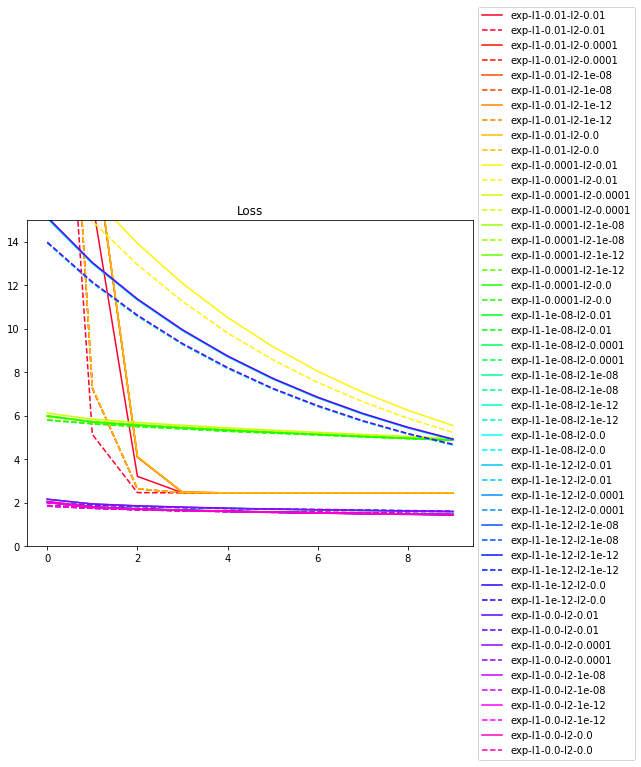

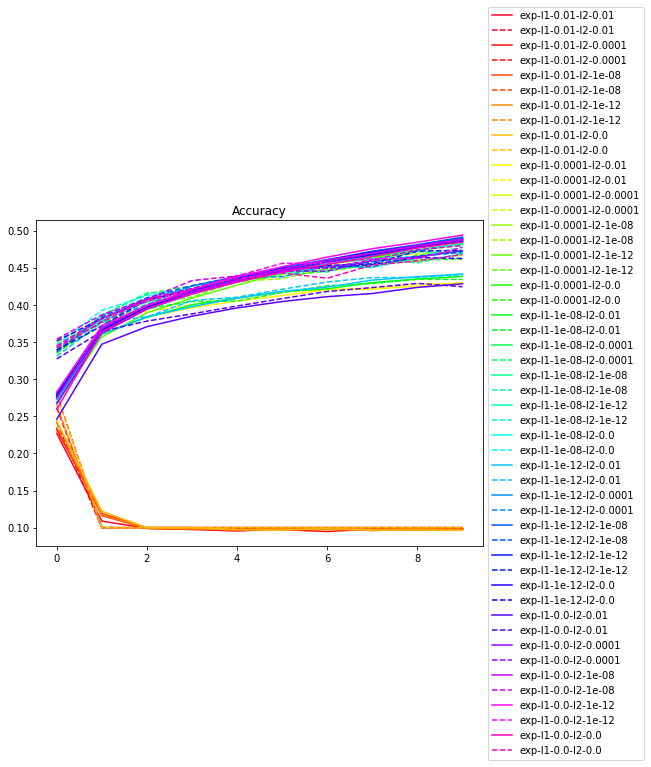

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 25

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 15])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()